In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import RFE
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

In [2]:
data = pd.read_csv('C:\\Users\\akayo\\Hacks\\Alpha_data\\train_1.csv')

In [3]:
data

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,feature_500
0,0,train,0,0.372342,1.500852,2.133451,-0.957384,-0.119022,0.122920,0.150993,...,-1.254497,0.0,0.803635,-1.017931,-0.521130,0.647188,1.453860,-0.833480,0.184028,-0.438225
1,0,train,1,0.382215,0.962629,-0.192558,-1.019986,-1.330412,-0.100149,-1.131326,...,-0.884458,0.0,-1.643735,-1.264842,-1.523788,0.604948,0.491954,-0.003686,0.469720,-1.094604
2,0,train,2,0.472528,-0.695334,0.537968,-0.033000,-0.364850,-0.441849,-0.035953,...,-0.322682,0.0,-0.496765,-0.051931,0.743209,-1.395109,0.147941,-0.007553,-0.981296,0.270930
3,0,train,3,0.512260,-1.231960,0.555326,1.456647,1.435358,0.168613,-0.628737,...,0.976566,0.0,1.183049,-0.178662,1.468147,-0.791254,0.000645,0.674715,0.803094,1.037068
4,0,train,4,1.487986,-0.164392,-1.197163,1.549057,0.952673,1.144201,-0.964000,...,-1.655236,0.0,1.076122,-0.555735,1.248728,-0.485943,0.458768,-0.444558,-0.333710,0.380206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449041,0,train,449041,-1.361170,-0.685736,0.270151,0.021570,-0.449457,0.333211,-2.172534,...,0.391052,0.0,1.374081,-0.520653,0.061887,-0.170242,-0.458099,-0.779307,1.204898,-1.146198
449042,0,train,449042,-0.077461,-0.423303,-1.332491,0.938922,0.611769,0.029830,1.003885,...,-0.504832,0.0,-0.960401,0.529591,0.853093,-0.277794,-0.785159,-0.323638,0.170126,-0.441154
449043,0,train,449043,0.862977,-0.878855,-0.540000,1.279250,0.602967,-0.147103,-0.762969,...,-0.007173,0.0,-0.288012,1.073586,1.752900,-0.841066,0.081714,-0.686817,-2.038086,-0.540116
449044,0,train,449044,-1.424335,0.728630,0.088147,-0.344344,2.013250,1.754754,-1.532420,...,0.177312,0.0,1.601795,-0.556962,0.015098,-0.181468,0.844969,0.321016,3.123940,-0.438593


In [4]:
X = data.drop(['smpl', 'id', 'target'], axis=1).values
y = data['target'].values

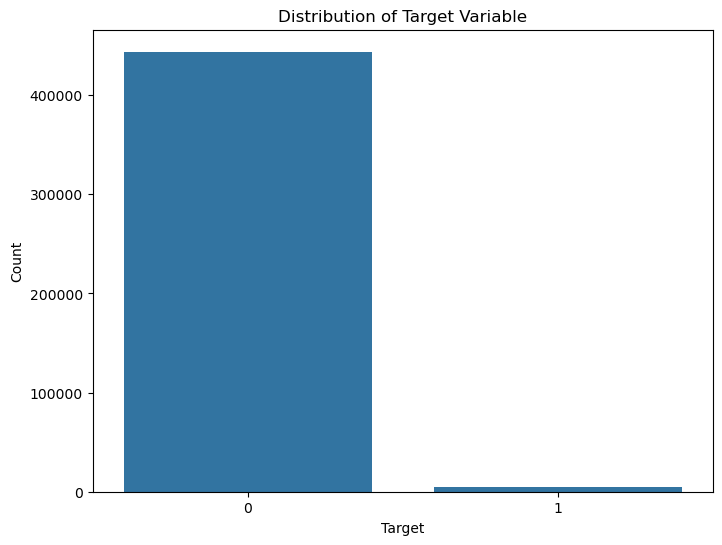

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [6]:
#Следовательно в валидации используем stratified_K_fold

In [ ]:
model = GradientBoostingClassifier()

In [7]:
#baseline without DE

In [9]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print('Обучение модели')
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train)

    print('Предсказание на тестовых данных')
    y_pred = model.predict_proba(X_test)[:, 1]

    # Вычисление метрики ROC-AUC
    auc = roc_auc_score(y_test, y_pred)

    # Вывод результатов
    print(f'Fold {fold + 1}, ROC-AUC: {auc:.4f}')

Обучение модели
Предсказание на тестовых данных
Fold 1, ROC-AUC: 0.8330
Обучение модели
Предсказание на тестовых данных
Fold 2, ROC-AUC: 0.8283
Обучение модели
Предсказание на тестовых данных
Fold 3, ROC-AUC: 0.8235
Обучение модели
Предсказание на тестовых данных
Fold 4, ROC-AUC: 0.8234
Обучение модели
Предсказание на тестовых данных
Fold 5, ROC-AUC: 0.8274
